In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D surface plotting

## Gaussian profile

/tmp/ipykernel_28296/1341543520.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


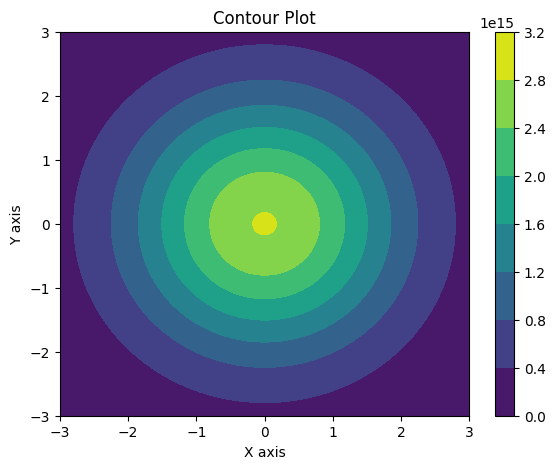

In [55]:
def gauss_constant_doping(x, y, Q0, Dt):
    return Q0*np.sqrt(1/4/np.pi/Dt)*np.exp(-(x**2 + y**2)/4/Dt) 

# Generate x and y values (meshgrid)
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)


Q0 = 1e16
Dt = 1

C = gauss_constant_doping(X, Y, Q0, Dt)

# Create a figure
fig = plt.figure(1)
ax2= fig.add_axes(rect=(.015, 0.15, 0.8, 0.8))

contour = ax2.contourf(X, Y, C, cmap='viridis')
ax2.set_title('Contour Plot')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
fig.colorbar(contour, ax=ax2)

# Show the plots
plt.tight_layout()
plt.show()

### Figuring out diffusion parameter from "Reference concentration" (ANSYS)

In [107]:
import numpy as np
from scipy.optimize import fsolve

ref_concentration = 1e6
concentration = 1e17 # peak concentration
wj = 0.1 # um -> junction width as defined in Ansys charge

def func(s):
    return ref_concentration/concentration - np.exp(-wj*wj/2/s/s)
def d_func(s):
    a = wj*wj/s/s/s
    return -a * np.exp(-wj*wj/2/s/s)

s = fsolve(func, 0.1, fprime=d_func, xtol=1e-15)
#s = fsolve(func, 0.1)
print(s)

[1.6487367e-12]


/tmp/ipykernel_28296/110601233.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  s = fsolve(func, 0.1, fprime=d_func, xtol=1e-15)


0.01405014529046929


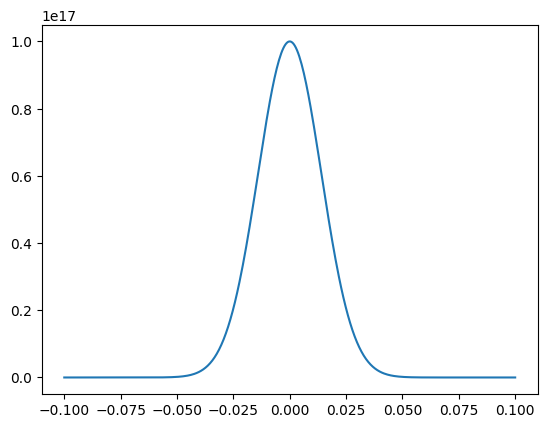

In [119]:
# plot with previous parameters
s = np.sqrt(-wj*wj/2/np.log(ref_concentration/concentration))
print(s)
X = np.linspace(-.1, .1, 400)
C = concentration*np.exp(-x*x/2/s/s)

plt.plot(X,C)
#plt.yscale("log")
plt.show()